## Random Forest regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [3]:
df = pd.read_csv('../../02_dataset/merged_df.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'mean_temp_t', 'mean_temp_t_1', 'gdp_percap',
       'gdp_percap_pchange', 'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange', 'population', 'participants', 'number_events',
       'yprotest', 'protest_fraction'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
0,0,AFG,1960,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.586,11.9,...,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,1961,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.588,12.3,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AFG,1962,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.591,12.0,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AFG,1963,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.593,12.8,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AFG,1964,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.596,11.3,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop rows with NaNs
df = df.dropna()

In [7]:
df.sort_values(by=['Year'])
df.head(5)

,Unnamed: 0,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
94,94,ALB,1990,36.410862,4.845877,1.0,5.279161e+09,Albania,0.101,12.5,...,-9.575638,10.304,0.000000,0.310099,0.0,3286542.0,31250.0,5.0,1.0,0.009508
95,95,ALB,1991,36.410862,3.617481,3.0,3.800883e+09,Albania,0.102,11.5,...,-28.002145,10.304,0.000000,0.310099,0.0,3266790.0,62250.0,8.0,1.0,0.019055
96,96,ALB,1992,36.410862,4.678144,5.0,3.527709e+09,Albania,0.104,12.2,...,-7.187107,30.007,191.217003,0.310099,0.0,3247039.0,22050.0,3.0,1.0,0.006791
97,97,ALB,1993,36.410862,2.649238,5.0,3.864937e+09,Albania,0.105,12.1,...,9.559405,25.251,-15.849635,0.310099,0.0,3227287.0,20050.0,2.0,1.0,0.006213
98,98,ALB,1994,36.410862,1.522285,5.0,4.185838e+09,Albania,0.107,13.2,...,8.302867,20.835,-17.488416,0.310099,0.0,3207536.0,2500.0,1.0,1.0,0.000779


In [8]:
df['ISO3_code'].unique()

array(['ALB', 'DZA', 'AGO', 'ARM', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL',
       'BEN', 'BTN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'CAN',
       'CAF', 'TCD', 'CHL', 'COL', 'CRI', 'HRV', 'CYP', 'DNK', 'DJI',
       'DOM', 'ECU', 'SLV', 'EST', 'ETH', 'FIN', 'GAB', 'GEO', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IDN',
       'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'LVA',
       'LBN', 'LSO', 'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
       'MEX', 'MDA', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NLD', 'NIC',
       'NER', 'NGA', 'NOR', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RWA', 'SEN', 'SRB', 'SLE', 'SVN', 'ZAF',
       'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'TJK', 'TZA', 'THA', 'TGO',
       'TUN', 'TKM', 'UGA', 'UKR', 'GBR', 'URY', 'UZB', 'ZMB', 'ZWE'],
      dtype=object)

#### Select country and year range

In [9]:
iso1 = 'PAK'
iso2 = 'UKR'
iso3 = 'IRQ'
iso = iso3
year_begin = 1960
year_end = 2023

# Filter by 'ISO3_code' (assuming it's the correct column name) and 'Year' range
df_plot = df[(df['ISO3_code'] == iso) & (df['Year'] >= year_begin) & (df['Year'] < year_end)]

In [10]:
#sns.pairplot(df_plot)

## Relationship between environmental, economical and political conditions
#### Features: *|* rainfall_var_t_1 *|* gdp *|* gdp_g *|* pt_gdp_agriculture *|* democracy_polity *|*
####   Target: *|* number_events *|*

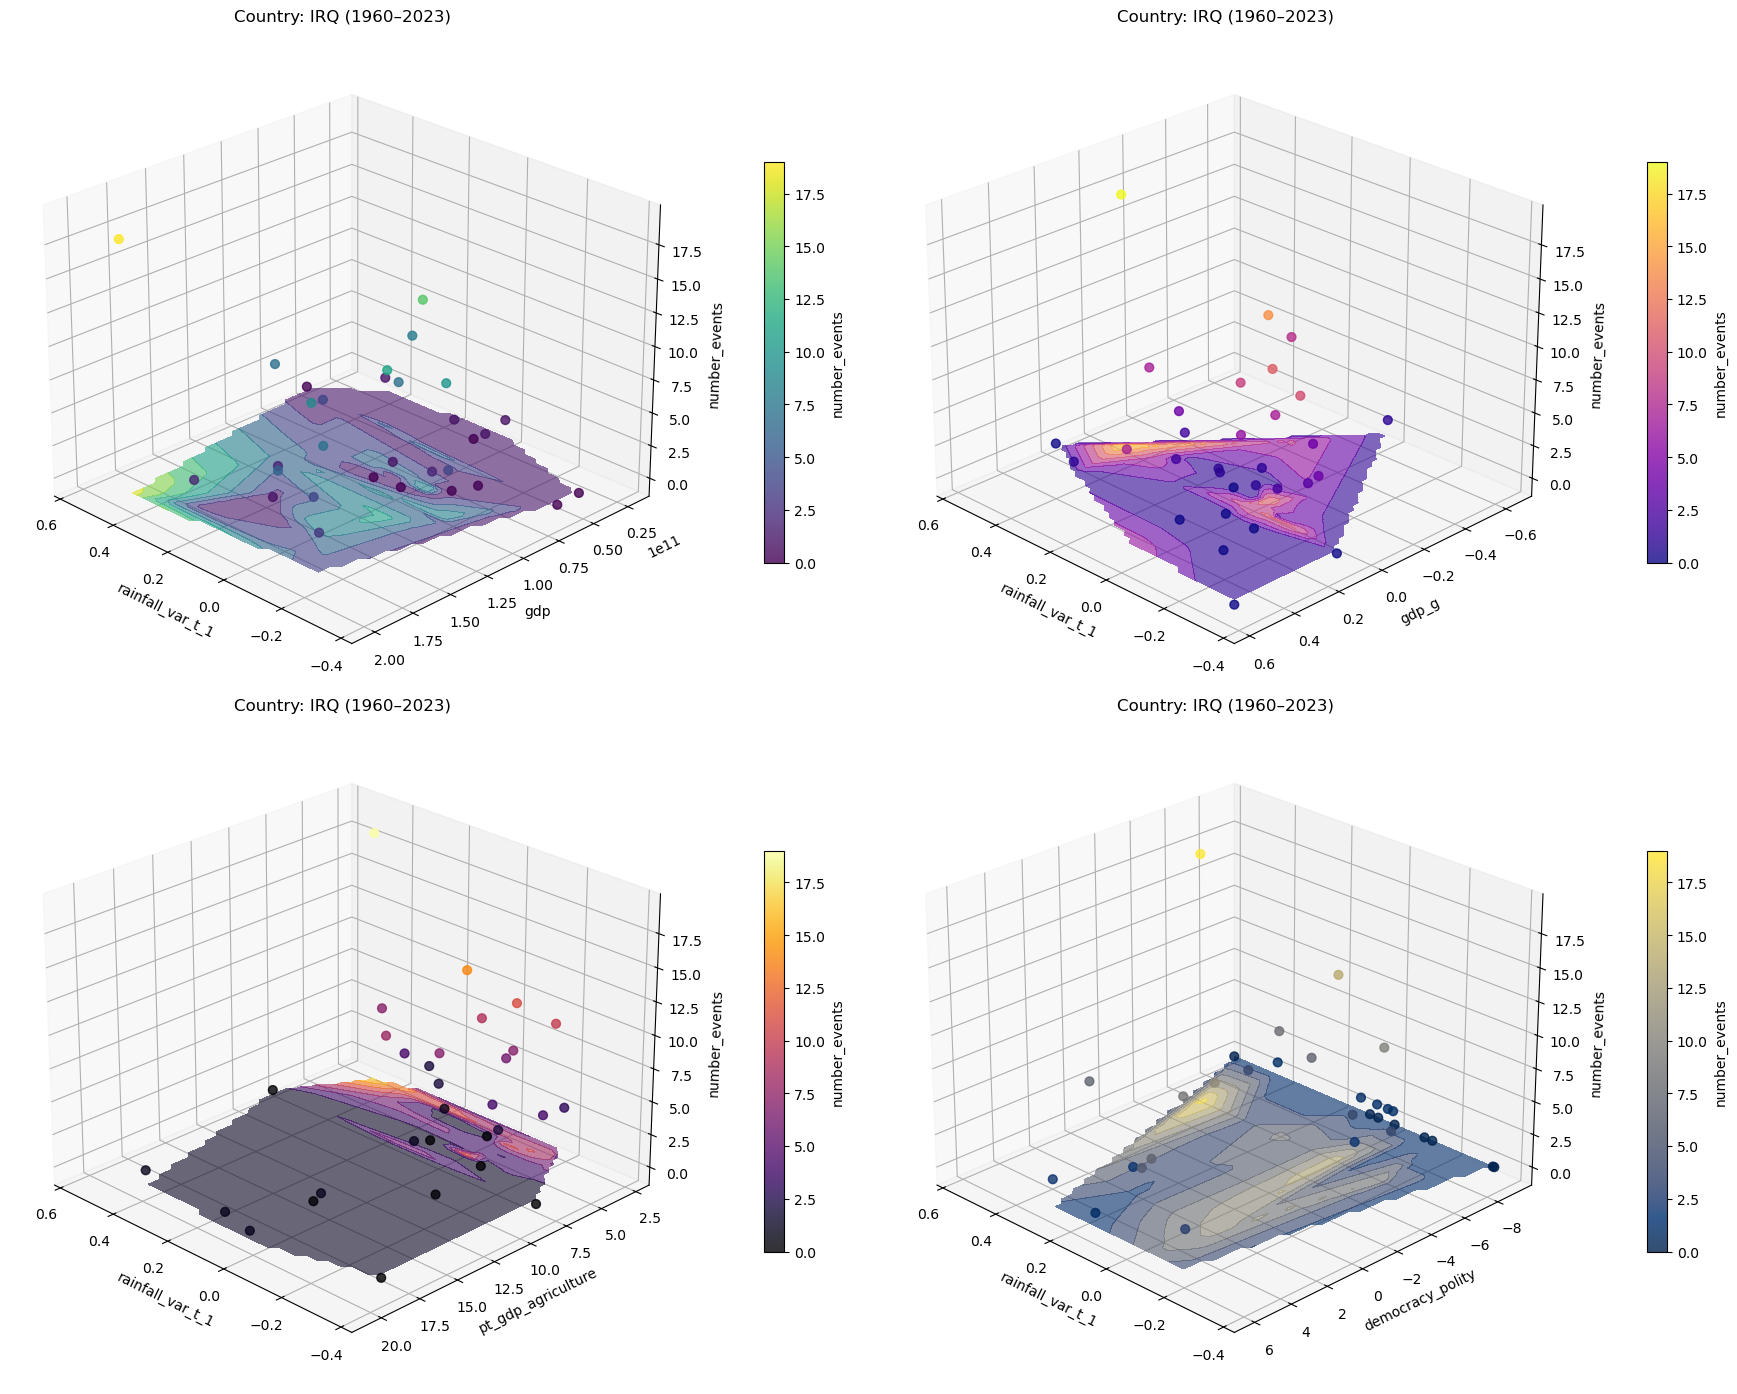

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Define variables for each plot
plots = [
    {'x': 'rainfall_var_t_1', 'y': 'gdp', 'z': 'number_events', 'cmap': 'viridis'},
    {'x': 'rainfall_var_t_1', 'y': 'gdp_g', 'z': 'number_events', 'cmap': 'plasma'},
    {'x': 'rainfall_var_t_1', 'y': 'pt_gdp_agriculture', 'z': 'number_events', 'cmap': 'inferno'},
    {'x': 'rainfall_var_t_1', 'y': 'democracy_polity', 'z': 'number_events', 'cmap': 'cividis'}
]

fig = plt.figure(figsize=(18, 14))

for i, plot in enumerate(plots, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    # Extract data
    x = df_plot[plot['x']]
    y = df_plot[plot['y']]
    z = df_plot[plot['z']]
    c = z
    
    # Scatter
    sc = ax.scatter(x, y, z, c=c, cmap=plot['cmap'], s=40, alpha=0.8)
    
    # Colorbar
    cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label(f"{plot['z']}")
    
    # Grid and interpolation
    xi = np.linspace(x.min(), x.max(), 50)
    yi = np.linspace(y.min(), y.max(), 50)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')
    
    # Contour projection
    ax.contourf(xi, yi, zi, zdir='z', offset=z.min(), cmap=plot['cmap'], alpha=0.6)
    
    # Labels and title
    ax.set_xlabel(f"{plot['x']}")
    ax.set_ylabel(f"{plot['y']}")
    ax.set_zlabel(f"{plot['z']}")
    ax.set_title(f'Country: {iso} ({year_begin}–{year_end})')
    
    # View angle
    ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()


## Using Decision Tree for regression

In [12]:
## import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [13]:
feats = ['rainfall_var_t_1', 'pt_gdp_agriculture', 'democracy_polity', 'gdp', 'gdp_g']
#target = 'participants'
target = 'number_events'

train_data, test_data = train_test_split(df_plot, test_size=0.3)

In [14]:
## make the model objects
tree_1 = DecisionTreeRegressor(max_depth = 1, random_state=0)
tree_2 = DecisionTreeRegressor(max_depth = 3, random_state=0)

## fit the objects
tree_1.fit(train_data[feats],train_data[target])
tree_2.fit(train_data[feats],train_data[target])

DecisionTreeRegressor(max_depth=3, random_state=0)

In [15]:
# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Decision Tree 1) Train MSE:", mean_squared_error(train_data[target], tree_1.predict(train_data[feats]), squared=False))
print("Decision Tree 1) Train R²:", r2_score(train_data[target], tree_1.predict(train_data[feats])))
print("Decision Tree 1) Test MSE:", mean_squared_error(test_data[target], tree_1.predict(test_data[feats]), squared=False))
print("Decision Tree 1) Test R²:", r2_score(test_data[target], tree_1.predict(test_data[feats])))
print('')

print("Decision Tree 2) Train MSE:", mean_squared_error(train_data[target], tree_2.predict(train_data[feats]), squared=False))
print("Decision Tree 2) Train R²:", r2_score(train_data[target], tree_2.predict(train_data[feats])))
print("Decision Tree 2) Test MSE:", mean_squared_error(test_data[target], tree_2.predict(test_data[feats]), squared=False))
print("Decision Tree 2) Test R²:", r2_score(test_data[target], tree_2.predict(test_data[feats])))
print('')

# Prediction
predicted_1 = tree_1.predict(test_data[feats])
predicted_2 = tree_2.predict(test_data[feats])
print(f"Tree 1) Predicted # events: {predicted_1[0]}")
print(f"Tree 2) Predicted # events: {predicted_2[0]}")

Decision Tree 1) Train MSE: 3.642224713797993
Decision Tree 1) Train R²: 0.538189281511037
Decision Tree 1) Test MSE: 3.83311797215136
Decision Tree 1) Test R²: -1.5332402393844404

Decision Tree 2) Train MSE: 1.828999205915108
Decision Tree 2) Train R²: 0.8835451531417746
Decision Tree 2) Test MSE: 8.24962120342504
Decision Tree 2) Test R²: -10.733836206896552

Tree 1) Predicted # events: 0.4
Tree 2) Predicted # events: 1.0


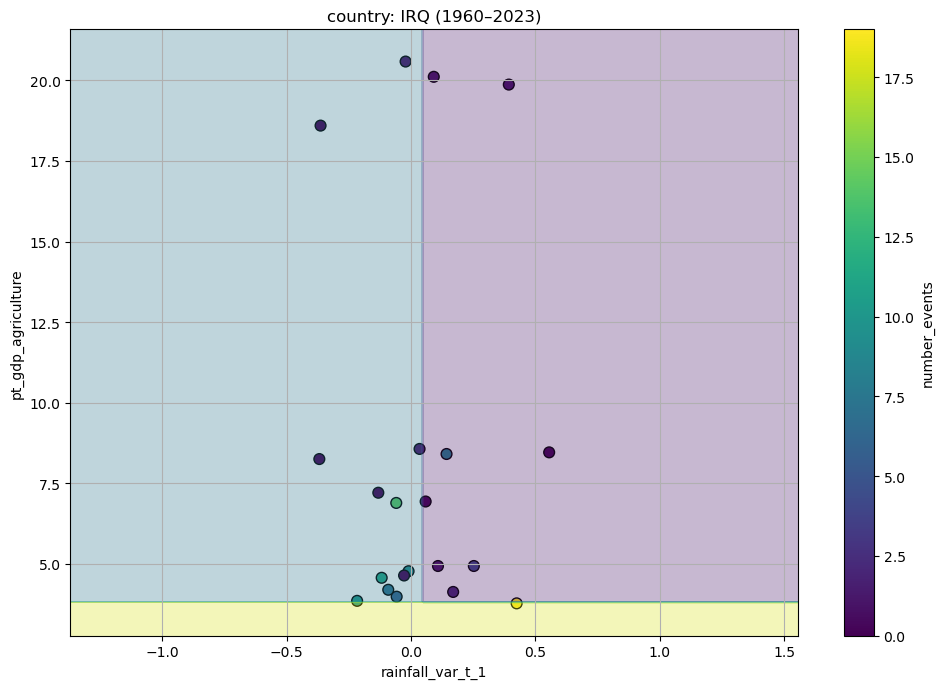

In [16]:
# Choose two features for the meshgrid
x1 = 'rainfall_var_t_1'
x2 = 'pt_gdp_agriculture'

# Values for other features — use means from training data
fixed_vals = train_data[feats].drop([x1, x2], axis=1).mean()

# Create meshgrid for x1 and x2
x_min, x_max = train_data[x1].min() - 1, train_data[x1].max() + 1
y_min, y_max = train_data[x2].min() - 1, train_data[x2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Prepare the grid points for prediction
grid_points = pd.DataFrame({
    x1: xx.ravel(),
    x2: yy.ravel()
})

# Add the fixed values for the other features
for col in feats:
    if col not in [x1, x2]:
        grid_points[col] = fixed_vals[col]

# Predict over the grid
Z = tree_2.predict(grid_points)

# Reshape to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 7))

# Scatter actual data points
scatter = plt.scatter(train_data[x1], train_data[x2], c=train_data[target], cmap='viridis', edgecolor='k', s=60)

# Contourf for predicted surface
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Labels and colorbar
plt.xlabel(x1)
plt.ylabel(x2)
plt.title(f'country: {iso} ({year_begin}–{year_end})')

cbar = plt.colorbar(scatter)
cbar.set_label(target)

plt.grid(True)
plt.tight_layout()
plt.show()

## Using Random Forest for regression

In [17]:
## import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
## make the model objects
rf_1 = RandomForestRegressor(n_estimators=500, max_depth = 1, random_state=0)
rf_2 = RandomForestRegressor(n_estimators=500, max_depth = 3, random_state=0)

## fit the objects
rf_1.fit(train_data[feats],train_data[target])
rf_2.fit(train_data[feats],train_data[target])

RandomForestRegressor(max_depth=3, n_estimators=500, random_state=0)

In [19]:
# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Random Forest 1) Train MSE:", mean_squared_error(train_data[target], rf_1.predict(train_data[feats]), squared=False))
print("Random Forest 1) Train R²:", r2_score(train_data[target], rf_1.predict(train_data[feats])))
print("Random Forest 1) Test MSE:", mean_squared_error(test_data[target], rf_1.predict(test_data[feats]), squared=False))
print("Random Forest 1) Test R²:", r2_score(test_data[target], rf_1.predict(test_data[feats])))
print('')

print("Random Forest 2) Train MSE:", mean_squared_error(train_data[target], rf_2.predict(train_data[feats]), squared=False))
print("Random Forest 2) Train R²:", r2_score(train_data[target], rf_2.predict(train_data[feats])))
print("Random Forest 2) Test MSE:", mean_squared_error(test_data[target], rf_2.predict(test_data[feats]), squared=False))
print("Random Forest 2) Test R²:", r2_score(test_data[target], rf_2.predict(test_data[feats])))
print('')

# Prediction
predicted_1 = rf_1.predict(test_data[feats])
predicted_2 = rf_2.predict(test_data[feats])
print(f"Random Forest 1) Predicted # events: {predicted_1[0]}")
print(f"Random Forest 2) Predicted # events: {predicted_2[0]}")

Random Forest 1) Train MSE: 3.3052336018285393
Random Forest 1) Train R²: 0.6196925323072704
Random Forest 1) Test MSE: 3.726619748778796
Random Forest 1) Test R²: -1.3944301296531272

Random Forest 2) Train MSE: 1.8760572781572713
Random Forest 2) Train R²: 0.8774755611210334
Random Forest 2) Test MSE: 4.908459683303683
Random Forest 2) Test R²: -3.153961459072015

Random Forest 1) Predicted # events: 1.2363036605809044
Random Forest 2) Predicted # events: 0.5371441058941058


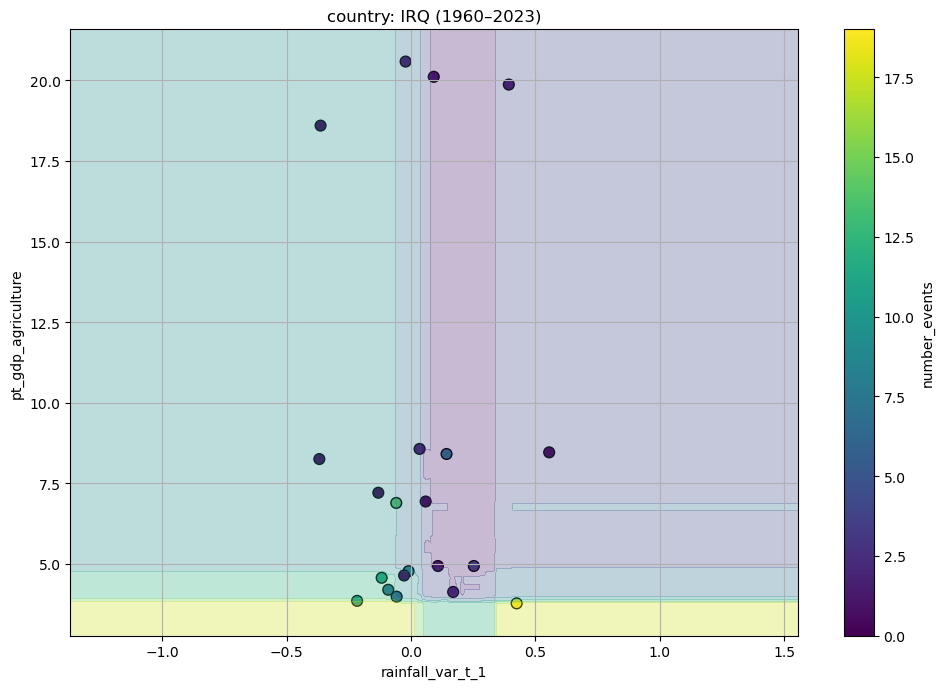

In [20]:
# Choose two features for the meshgrid
x1 = 'rainfall_var_t_1'
x2 = 'pt_gdp_agriculture'

# Values for other features — use means from training data
fixed_vals = train_data[feats].drop([x1, x2], axis=1).mean()

# Create meshgrid for x1 and x2
x_min, x_max = train_data[x1].min() - 1, train_data[x1].max() + 1
y_min, y_max = train_data[x2].min() - 1, train_data[x2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Prepare the grid points for prediction
grid_points = pd.DataFrame({
    x1: xx.ravel(),
    x2: yy.ravel()
})

# Add the fixed values for the other features
for col in feats:
    if col not in [x1, x2]:
        grid_points[col] = fixed_vals[col]

# Predict over the grid
Z = rf_2.predict(grid_points)

# Reshape to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 7))

# Scatter actual data points
scatter = plt.scatter(train_data[x1], train_data[x2], c=train_data[target], cmap='viridis', edgecolor='k', s=60)

# Contourf for predicted surface
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Labels and colorbar
plt.xlabel(x1)
plt.ylabel(x2)
plt.title(f'country: {iso} ({year_begin}–{year_end})')

cbar = plt.colorbar(scatter)
cbar.set_label(target)

plt.grid(True)
plt.tight_layout()
plt.show()

## Cross-validation to choose between RF(max_depth = 1) and RF(max_depth = 3)

### Validation set

In [21]:
## Here we make a validation set with 15% of the 
## training data in the validation set
X_train_train, X_val, y_train_train, y_val = train_test_split(train_data[feats], train_data[target],
                                                                 shuffle = True,
                                                                 random_state = 321,
                                                                 test_size=.15)

In [22]:
## import KFold
from sklearn.model_selection import KFold

In [23]:
## make a KFold object
## n_splits controls the value of k
## shuffle=True, randomly shuffles the data prior to splitting
## random_state is the same as for train_test_split
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

In [24]:
## demonstrate.split
#kfold.split(train_data[feats], train_data[target])

In [25]:
from sklearn.metrics import mean_squared_error

# rmses will hold the cross validation root mean squared errors of each model. 
rmses = np.zeros((2, 5))

for i, (train_index, test_index) in enumerate(kfold.split(train_data[feats], train_data[target])):
    ## get the kfold training data
    X_train_train = train_data[feats].iloc[train_index,:]
    y_train_train = train_data[target].iloc[train_index]
    
    ## get the holdout data
    X_holdout = train_data[feats].iloc[test_index,:]
    y_holdout = train_data[target].iloc[test_index]

    ## Fit both models
    rf_1.fit(X_train_train,y_train_train)
    rf_2.fit(X_train_train,y_train_train)

    ## Use both models to generate predictions on the holdout set
    rf_1_preds = rf_1.predict(X_holdout)
    rf_2_preds = rf_2.predict(X_holdout)


    ## Record the rmses
    rmses[0,i] = np.sqrt(mean_squared_error(y_holdout, rf_1_preds))
    rmses[1,i] = np.sqrt(mean_squared_error(y_holdout, rf_2_preds))

In [ ]:
rmses.mean(axis = 1) 

array([4.34466755, 4.43770329])

We can see that the RandomForest(max_depth = 1) regression model does generalize a bit better then RandomForest(max_depth = 3).